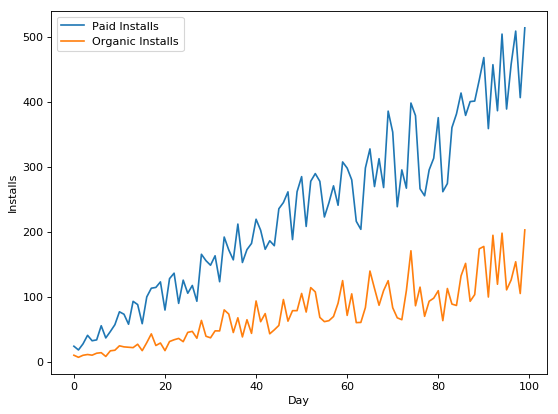

Covariance: 5414.116003720048
Correlation Coefficient: 0.918817333499156


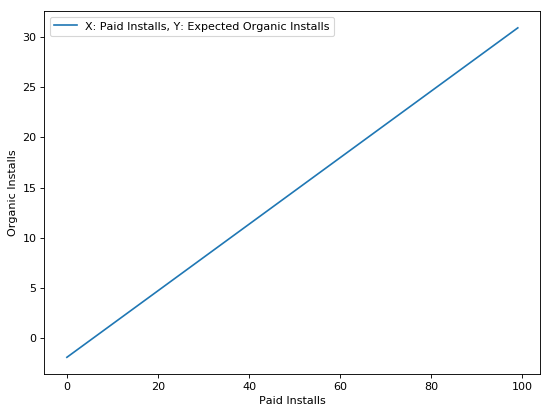

Paid Installs: 10, Organic Installs: 1
Paid Installs: 50, Organic Installs: 14
Paid Installs: 100, Organic Installs: 31
Paid Installs: 1000, Organic Installs: 329


In [94]:
import matplotlib.pyplot as plt
import random
from matplotlib.pyplot import figure
from scipy.optimize import curve_fit
from scipy.stats import linregress
import numpy as np
import pandas as pd

x = [ 1, 100 ] #day 1 to 111
y = [ 30, 500 ] #y here is paid installs, so start at 30 at day 1 and end at 500 (the end = day 100, as per x)

model = linregress( x, y ) #create a simple linear regression model from the data above

#we'll use the linear model parameters to project Paid Installs out to Day 100, but we'll also add some noise
y = [ ( model[ 0 ] * x + model[ 1 ] ) * ( 1 + random.randint( -400, 100 ) / 1000 ) for x in range( x[ 1 ] ) ]
#now we'll use some arbitrary multiplier (divisor, actually) to create a sample Organic installs sample
#that has a relationship to paid
y2 = [ (v/ random.randint( 3, 5 ) ) * ( 1 + random.randint( 100, 300 ) / 1000 ) for v in y ]

#Plot the Paid and Organic install data
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot( y, label='Paid Installs' )
plt.plot( y2, label='Organic Installs' )
plt.ylabel( 'Installs' )
plt.xlabel( 'Day' )
plt.legend()
plt.show()

#calculate the Population covariance between Paid and Organic. 
cov = np.cov( y, y2, bias=True )[ 0 ][ 1 ]
print( "Covariance: " + str( cov ) )

#Calculate the Pearson's correlation coefficient between Paid and Organic installs
cor_coeff = np.corrcoef( y, y2 )
print( "Correlation Coefficient: " + str( cor_coeff[ 0 ][ 1 ] ) )

#Now we'll create a second simple linear regression model where Paid Installs is the independent variable (X)
#and Organic installs is the dependent variable (Y). This will express the relationship between Paid and Organic
model2 = linregress( y, y2 )

#Now we'll create a list of Organic installs at various levels of Paid installs, from 1 to 100 (Paid Installs)
organic_paid = [ ( model2[ 0 ] * x + model2[ 1 ] ) for x in range( 100 ) ]

#Plot the Paid (x) vs. Organic (y) projection
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot( organic_paid, label='X: Paid Installs, Y: Expected Organic Installs' )
plt.ylabel( 'Organic Installs' )
plt.xlabel( 'Paid Installs' )
plt.legend()
plt.show()

#Some examples
print( "Paid Installs: 10, Organic Installs: " + str( int( model2[ 0 ] * 10 + model2[ 1 ] ) ) )
print( "Paid Installs: 50, Organic Installs: " + str( int( model2[ 0 ] * 50 + model2[ 1 ] ) ) )
print( "Paid Installs: 100, Organic Installs: " + str( int( model2[ 0 ] * 100 + model2[ 1 ] ) ) )
print( "Paid Installs: 1000, Organic Installs: " + str( int( model2[ 0 ] * 1000 + model2[ 1 ] ) ) )